<a href="https://colab.research.google.com/github/Somesh140/Kmeans/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/Somesh140/Kmeans/main/Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X=dataset.iloc[:,[3,4]].values

In [17]:
X.shape

(200, 2)

In [5]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters=5)
y_kmeans=kmeans.fit_predict(X)

In [16]:
y_kmeans.shape

(200,)

In [8]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

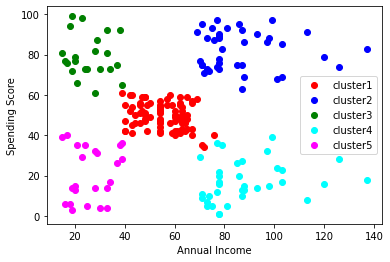

In [20]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],c="red",label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],c="blue",label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],c="green",label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],c="cyan",label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],c="magenta",label='cluster5')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [21]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

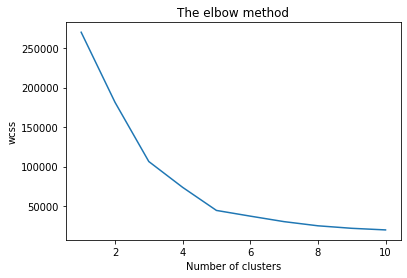

In [24]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("The elbow method")
plt.show()